In [4]:
import numpy as np
import matplotlib.pyplot as plt
from integral_functions.weight_functions import get_weights
# For more Cython info on the import statement, visit the link: https://stackoverflow.com/questions/7508803/how-do-i-import-function-from-pyx-file-in-python
from scipy.stats import chi2

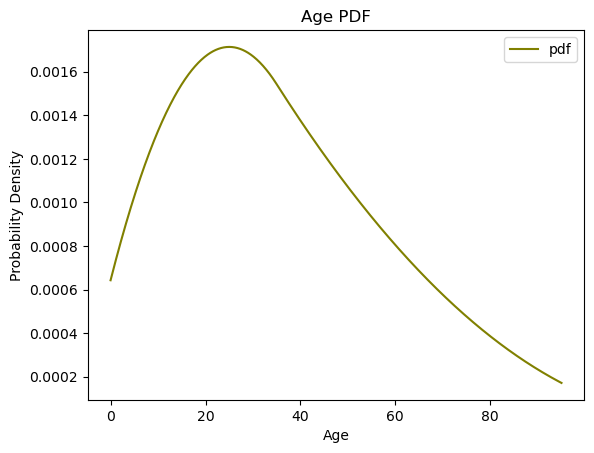

In [74]:
# We define the relevant age range
low_age = 0
high_age = 95
age_range = np.linspace(low_age, high_age, 1000)

def f(x):
    return -((1 / 5) * x - 5)**2 + 40

def g(x):
    return ((x / 15) - 8.3335)**2

def age_distribution(age):
    if 0 <= age <= 35:
        return f(age)
    else:
        return g(age)
    
distribution = np.array([age_distribution(age) for age in age_range])

distribution /= np.sum(distribution)

plt.plot(age_range, distribution, label="pdf", c="olive")
plt.xlabel("Age")
plt.ylabel("Probability Density")
plt.title("Age PDF")
plt.legend()
plt.show()

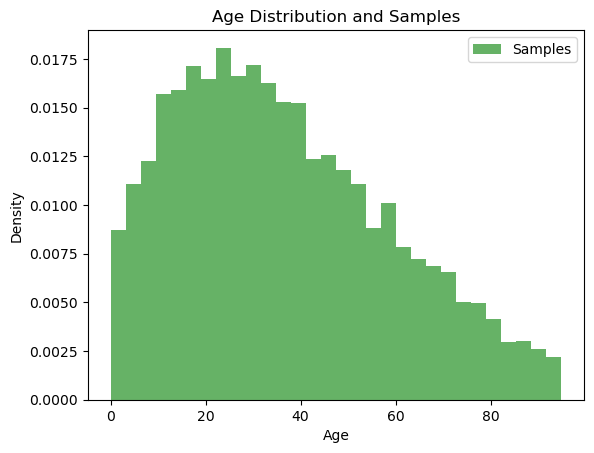

In [82]:
sample_no = 10000

cdf = np.cumsum(distribution)
cdf /= cdf[-1]

samples = np.random.rand(sample_no)
age_samples = np.interp(samples, cdf, age_range)

plt.hist(age_samples, bins=30, density=True, alpha=0.6, color='g', label="Samples")
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution and Samples")
plt.legend()
plt.show()